In [1]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt

# Used for data storage and manipulation 
import numpy as np
import pandas as pd

# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For stepwise regression
import statsmodels.api as sm

# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [2]:
# Load NFL data 
data = pd.read_csv("NFL data.csv")

In [3]:
# adding .head() to your dataset allows you to see the first rows in the dataset. 
# Add a # inside the brackets to specificy how many rows are returned or else 5 rows are returned.
print(data.shape)
# (12144, 18)
data.head()

(12144, 18)


,schedule_date,schedule_season,schedule_week,team_home,team_away,stadium,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,stadium_neutral,schedule_playoff,game_id
0,09/02/1966,1966,1,Miami Dolphins,Oakland Raiders,Orange Bowl,NaN,NaN,NaN,NaN,83.0,6.0,71,14,23,False,False,19660902OAKMIA
1,09/03/1966,1966,1,Houston Oilers,Denver Broncos,Rice Stadium,NaN,NaN,NaN,NaN,81.0,7.0,70,45,7,False,False,19660903DENTEN
2,09/04/1966,1966,1,San Diego Chargers,Buffalo Bills,Balboa Stadium,NaN,NaN,NaN,NaN,70.0,7.0,82,27,7,False,False,19660904BUFLAC
3,09/09/1966,1966,2,Miami Dolphins,New York Jets,Orange Bowl,NaN,NaN,NaN,NaN,82.0,11.0,78,14,19,False,False,19660909NYJMIA
4,09/10/1966,1966,1,Green Bay Packers,Baltimore Colts,Lambeau Field,NaN,NaN,NaN,64 degrees- humidity 62%- wind 8 mph,64.0,8.0,62,24,3,False,False,19660910INDGB


In [4]:
# return only rows where the year is greater than 2009
current = data[(data['schedule_season'] > 2015)]

In [5]:
# check for the null values in each column
current.isna().sum()

schedule_date            0
schedule_season          0
schedule_week            0
team_home                0
team_away                0
stadium                  7
team_favorite_id         0
spread_favorite          0
over_under_line          0
weather_detail         381
weather_temperature      0
weather_wind_mph         0
weather_humidity       534
score_home               0
score_away               0
stadium_neutral          0
schedule_playoff         0
game_id                278
dtype: int64

In [6]:
# Delete Columns with missing value greater than 20%
current = current.dropna(thresh=0.8*len(current), axis=1)

In [7]:
# check AGAIN for the null values in each column 
current.isna().sum()

schedule_date          0
schedule_season        0
schedule_week          0
team_home              0
team_away              0
stadium                7
team_favorite_id       0
spread_favorite        0
over_under_line        0
weather_temperature    0
weather_wind_mph       0
score_home             0
score_away             0
stadium_neutral        0
schedule_playoff       0
dtype: int64

In [8]:
current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 11610 to 12143
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        534 non-null    object 
 1   schedule_season      534 non-null    int64  
 2   schedule_week        534 non-null    object 
 3   team_home            534 non-null    object 
 4   team_away            534 non-null    object 
 5   stadium              527 non-null    object 
 6   team_favorite_id     534 non-null    object 
 7   spread_favorite      534 non-null    float64
 8   over_under_line      534 non-null    object 
 9   weather_temperature  534 non-null    float64
 10  weather_wind_mph     534 non-null    float64
 11  score_home           534 non-null    int64  
 12  score_away           534 non-null    int64  
 13  stadium_neutral      534 non-null    bool   
 14  schedule_playoff     534 non-null    bool   
dtypes: bool(2), float64(3), int64(3), 

In [9]:
# Gives you summary statistics on your numeric columns
current.describe()

,schedule_season,spread_favorite,weather_temperature,weather_wind_mph,score_home,score_away
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2016.500000,-5.014045,61.715356,4.767790,23.692884,20.988764
std,0.500469,3.195372,17.083765,4.547685,10.055347,9.498290
min,2016.000000,-17.000000,2.000000,0.000000,0.000000,0.000000
25%,2016.000000,-7.000000,51.250000,0.000000,17.000000,14.000000
50%,2016.500000,-4.000000,68.000000,4.000000,24.000000,20.000000
75%,2017.000000,-3.000000,72.000000,7.000000,30.000000,27.000000
max,2017.000000,0.000000,91.000000,24.000000,57.000000,51.000000


In [10]:
current.head(10)

,schedule_date,schedule_season,schedule_week,team_home,team_away,stadium,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,stadium_neutral,schedule_playoff
11610,09/08/2016,2016,1,Denver Broncos,Carolina Panthers,Sports Authority Field at Mile High,CAR,-3.0,40.5,82.0,2.0,21,20,False,False
11611,09/11/2016,2016,1,Arizona Cardinals,New England Patriots,University of Phoenix Stadium,ARI,-8.5,44,72.0,0.0,21,23,False,False
11612,09/11/2016,2016,1,Atlanta Falcons,Tampa Bay Buccaneers,Georgia Dome,ATL,-2.5,47,72.0,0.0,24,31,False,False
11613,09/11/2016,2016,1,Baltimore Ravens,Buffalo Bills,M&T Bank Stadium,BAL,-3.0,44.5,82.0,7.0,13,7,False,False
11614,09/11/2016,2016,1,Dallas Cowboys,New York Giants,Cowboys Stadium,NYG,-1.0,47.5,72.0,0.0,19,20,False,False
11615,09/11/2016,2016,1,Houston Texans,Chicago Bears,Reliant Stadium,HOU,-5.5,42.5,87.0,2.0,23,14,False,False
11616,09/11/2016,2016,1,Indianapolis Colts,Detroit Lions,Lucas Oil Stadium,IND,-2.5,51.5,72.0,0.0,35,39,False,False
11617,09/11/2016,2016,1,Jacksonville Jaguars,Green Bay Packers,EverBank Field,GB,-3.5,47.5,91.0,1.0,23,27,False,False
11618,09/11/2016,2016,1,Kansas City Chiefs,San Diego Chargers,Arrowhead Stadium,KC,-6.5,46,73.0,7.0,33,27,False,False
11619,09/11/2016,2016,1,New Orleans Saints,Oakland Raiders,Louisiana Superdome,NO,-3.0,50.5,72.0,0.0,34,35,False,False


In [11]:
#  no warning message and no exception is raised
pd.options.mode.chained_assignment = None  # default='warn'
# Create a column titled home or away. This column will add a 1 to the row where the Tennessee Titans played at home 
# and a 0 for away games.
current['home_or_away'] = np.where(current['team_home'] == 'Tennessee Titans', 1, 0)

In [38]:
# Return rows where Tennessee Titans are either the home or away team
current2 = current.loc[(current["team_home"] == "Tennessee Titans") | (current["team_away"] == "Tennessee Titans")]

# filter to certain columns
final = current2.filter(["team_home","team_away" , "score_home","score_away" ,"weather_temperature","weather_wind_mph","home_or_away", "over_under_line"])

# merge score_away & score_home into column 'score'
final['score'] = np.where(final['team_away'] == 'Tennessee Titans', final['score_away'], final['score_home'])


# Before showing our final dataset we will drop any rows with NA values.
final = final.dropna()
final.head()

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,over_under_line,score
11623,Tennessee Titans,Minnesota Vikings,16,25,77.0,3.0,1,40,16
11631,Detroit Lions,Tennessee Titans,15,16,72.0,0.0,0,48,16
11656,Tennessee Titans,Oakland Raiders,10,17,89.0,3.0,1,47,10
11663,Houston Texans,Tennessee Titans,27,20,82.0,4.0,0,40,20
11682,Miami Dolphins,Tennessee Titans,17,30,87.0,12.0,0,44.5,30


In [13]:
final['2_game_avg'] = final.score.shift(periods=1).rolling(window=2).mean()
final['5_game_avg'] = final.score.shift(periods=1).rolling(window=5).mean()
final.head(10)

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,over_under_line,score,2_game_avg,5_game_avg
11623,Tennessee Titans,Minnesota Vikings,16,25,77.0,3.0,1,40,16,NaN,NaN
11631,Detroit Lions,Tennessee Titans,15,16,72.0,0.0,0,48,15,NaN,NaN
11656,Tennessee Titans,Oakland Raiders,10,17,89.0,3.0,1,47,10,15.5,NaN
11663,Houston Texans,Tennessee Titans,27,20,82.0,4.0,0,40,27,12.5,NaN
11682,Miami Dolphins,Tennessee Titans,17,30,87.0,12.0,0,44.5,17,18.5,NaN
11699,Tennessee Titans,Cleveland Browns,28,26,79.0,7.0,1,44.5,28,22.0,17.0
11715,Tennessee Titans,Indianapolis Colts,26,34,71.0,5.0,1,48,26,22.5,19.4
11717,Tennessee Titans,Jacksonville Jaguars,36,22,66.0,4.0,1,43.5,36,27.0,21.6
11740,San Diego Chargers,Tennessee Titans,43,35,74.0,3.0,0,47.5,43,31.0,26.8
11754,Tennessee Titans,Green Bay Packers,47,25,55.0,0.0,1,49,25,39.5,30.0


In [14]:
# Fill in the first 2 instances & first 5 instances with mean 
final = final.fillna(final.mean())

C:\Users\bips9\anaconda3\envs\fpenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [15]:
# This time we're checking for Outliers. Check each columns min & max to make sure the # is plausible
final.describe()

,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,score,2_game_avg,5_game_avg
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,24.794118,20.529412,62.176471,5.235294,0.470588,24.147059,23.984375,24.648276
std,11.302398,7.398752,21.400185,4.264432,0.506640,10.600550,7.394187,3.912267
min,9.000000,7.000000,2.000000,0.000000,0.000000,9.000000,12.500000,17.000000
25%,16.000000,16.250000,50.000000,2.000000,0.000000,16.000000,18.500000,21.750000
50%,23.500000,20.000000,71.500000,4.000000,0.000000,23.500000,23.000000,24.648276
75%,31.750000,25.750000,74.750000,7.750000,1.000000,27.750000,27.375000,27.400000
max,57.000000,37.000000,89.000000,17.000000,1.000000,57.000000,45.000000,31.600000


In [16]:
df = final[['weather_temperature','weather_wind_mph' ,'over_under_line','home_or_away', '2_game_avg','5_game_avg', 'score']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 11623 to 12137
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  34 non-null     float64
 1   weather_wind_mph     34 non-null     float64
 2   over_under_line      34 non-null     object 
 3   home_or_away         34 non-null     int32  
 4   2_game_avg           34 non-null     float64
 5   5_game_avg           34 non-null     float64
 6   score                34 non-null     int64  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 2.0+ KB


In [18]:
# Need to convert three columns to  float64 Dtype
df['home_or_away'] = df['home_or_away'].astype('float64')
df['over_under_line'] = df['over_under_line'].astype('float64')
df['score'] = df['score'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 11623 to 12137
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  34 non-null     float64
 1   weather_wind_mph     34 non-null     float64
 2   over_under_line      34 non-null     float64
 3   home_or_away         34 non-null     float64
 4   2_game_avg           34 non-null     float64
 5   5_game_avg           34 non-null     float64
 6   score                34 non-null     float64
dtypes: float64(7)
memory usage: 2.1 KB


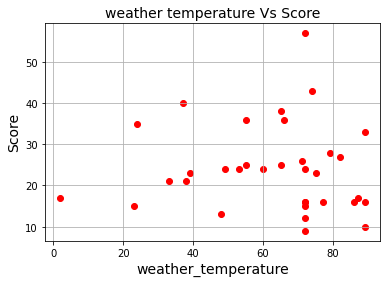

In [19]:
plt.scatter(df['weather_temperature'], df['score'], color='red')
plt.title('weather temperature Vs Score', fontsize=14)
plt.xlabel('weather_temperature', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

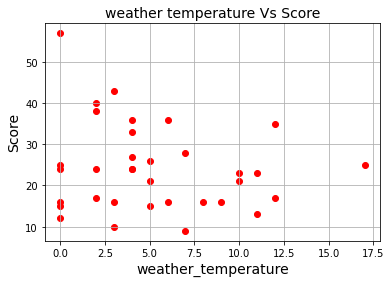

In [20]:
plt.scatter(df['weather_wind_mph'], df['score'], color='red')
plt.title('weather temperature Vs Score', fontsize=14)
plt.xlabel('weather_temperature', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

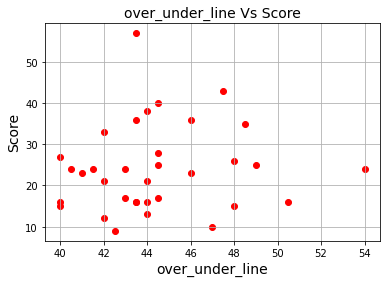

In [21]:
plt.scatter(df['over_under_line'], df['score'], color='red')
plt.title('over_under_line Vs Score', fontsize=14)
plt.xlabel('over_under_line', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

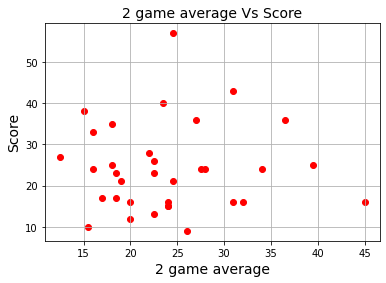

In [22]:
plt.scatter(df['2_game_avg'], df['score'], color='red')
plt.title('2 game average Vs Score', fontsize=14)
plt.xlabel('2 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

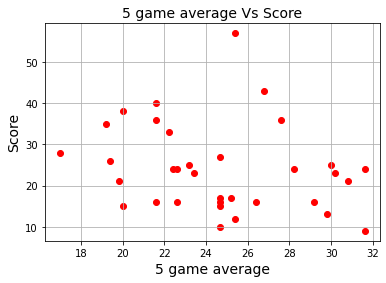

In [23]:
plt.scatter(df['5_game_avg'], df['score'], color='red')
plt.title('5 game average Vs Score', fontsize=14)
plt.xlabel('5 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

<AxesSubplot:xlabel='home_or_away', ylabel='score'>

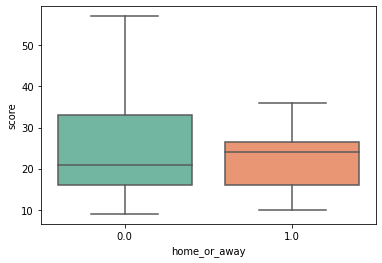

In [24]:
sns.boxplot(x ="home_or_away", y = "score", data = df, palette="Set2")

In [25]:
corr = df.corr()
corr

,weather_temperature,weather_wind_mph,over_under_line,home_or_away,2_game_avg,5_game_avg,score
weather_temperature,1.000000,-0.067211,0.059856,0.014468,0.122602,0.125592,-0.050344
weather_wind_mph,-0.067211,1.000000,-0.066278,0.017326,-0.238109,-0.141549,-0.160330
over_under_line,0.059856,-0.066278,1.000000,-0.076548,0.357581,0.047768,0.100175
home_or_away,0.014468,0.017326,-0.076548,1.000000,0.074697,-0.123466,-0.080984
2_game_avg,0.122602,-0.238109,0.357581,0.074697,1.000000,0.430738,0.012891
5_game_avg,0.125592,-0.141549,0.047768,-0.123466,0.430738,1.000000,-0.232599
score,-0.050344,-0.160330,0.100175,-0.080984,0.012891,-0.232599,1.000000


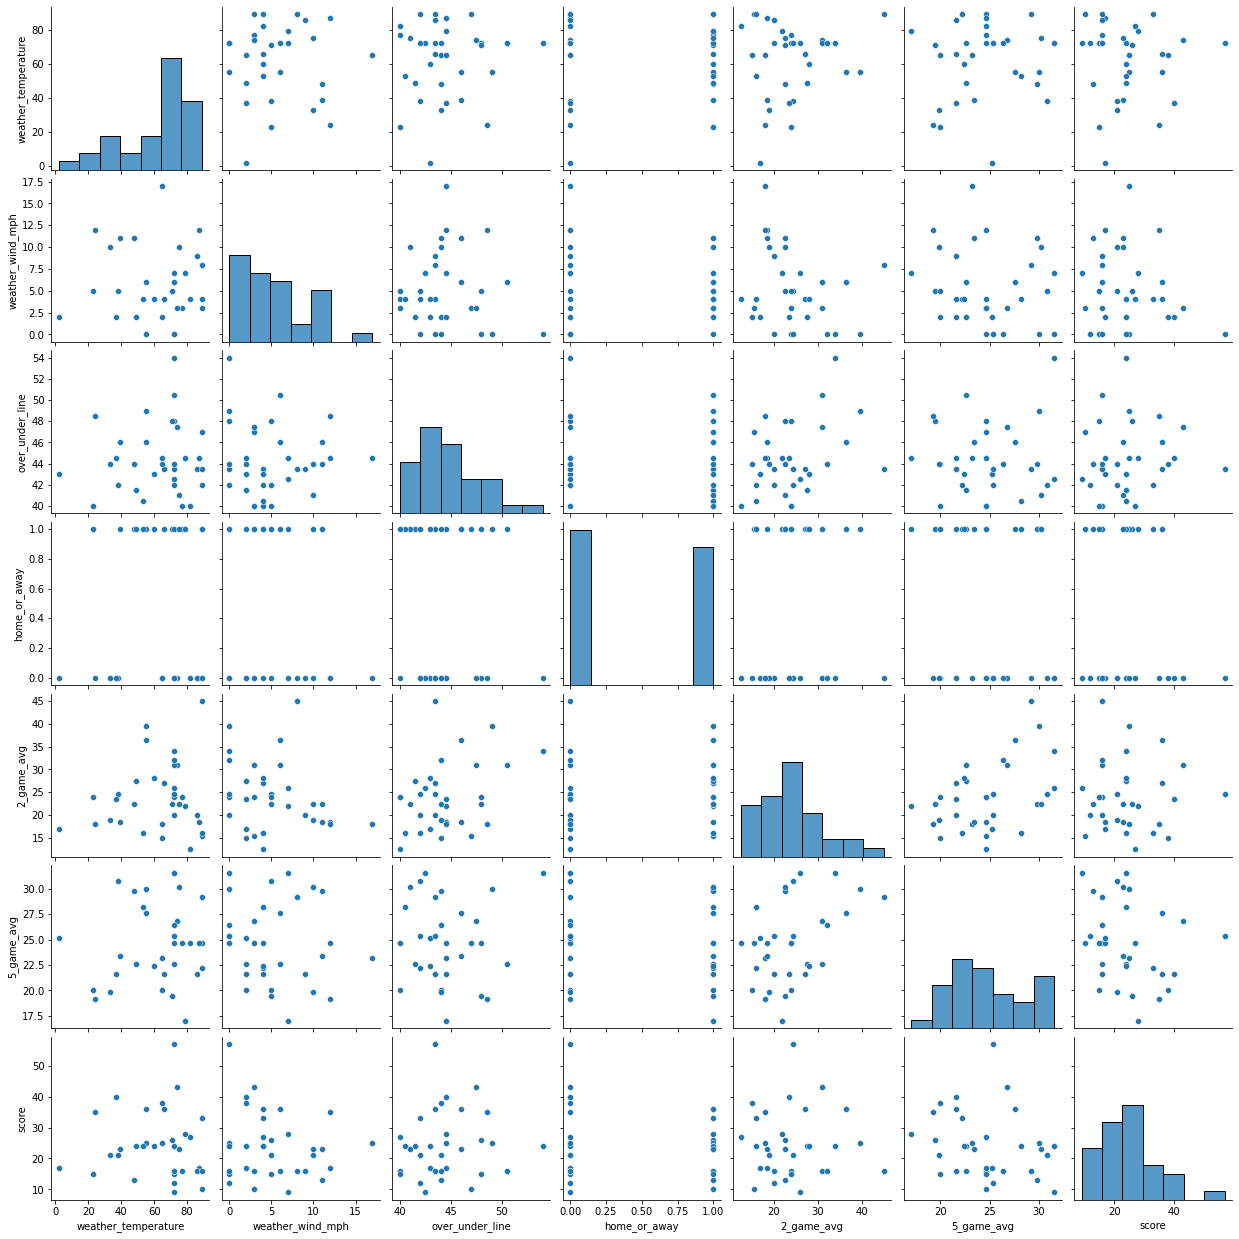

In [26]:
# More optional EDA
pairplot(df)

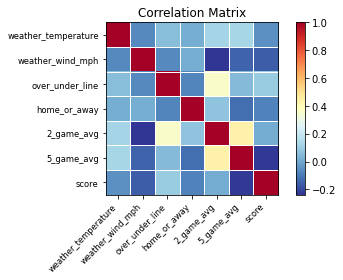

In [27]:
# More optional EDA
fig= plot_corr(corr,xnames=corr.columns)

In [28]:
X = pd.DataFrame(df, columns = ['weather_temperature', 'home_or_away'])
y = pd.DataFrame(df, columns=['score'])

# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       weather_temperature  home_or_away
12113                 39.0           1.0
       weather_temperature  home_or_away
11841                 65.0           0.0
       score
12113   23.0
       score
11841   38.0


In [29]:
# Create linear regression model
lin_reg_mod = LinearRegression()

# Fit linear regression
lin_reg_mod.fit(X_train, y_train)

# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [30]:
# Get the slope and intercept of the line best fit.
print(lin_reg_mod.intercept_)


print(lin_reg_mod.coef_)

[22.42251205]
[[-0.01904764  1.9271491 ]]


In [31]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)
# The closer towards 1, the better the fit
print(test_set_r2)

14.894357214153391
-0.38501557134631237


In [32]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['score']) - abs(df_results['Predicted'])
print(df_results)

       score  Predicted  Residuals
11841   38.0  21.184415  16.815585
11931   57.0  21.051082  35.948918
11663   27.0  20.860606   6.139394
12067   24.0  23.206803   0.793197
12133   21.0  21.793940  -0.793940
12043   16.0  21.051082  -5.051082
11948   16.0  20.727272  -4.727272
12023   40.0  21.717749  18.282251
12020   24.0  23.340136   0.659864


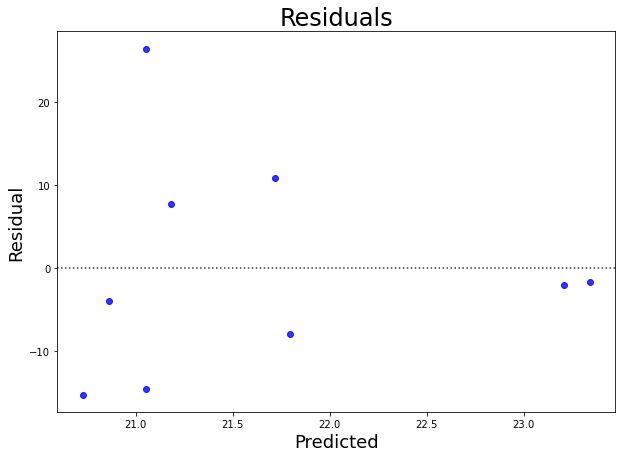

In [33]:
# Residual plot using df_result
fig = plt.figure(figsize=(10,7))
sns.residplot(x = "Predicted", y = "score",data = df_results, color='blue')

# Title and labels.
plt.title('Residuals', size=24)
plt.xlabel('Predicted', size=18)
plt.ylabel('Residual', size=18);

AttributeError: 'float' object has no attribute 'min'

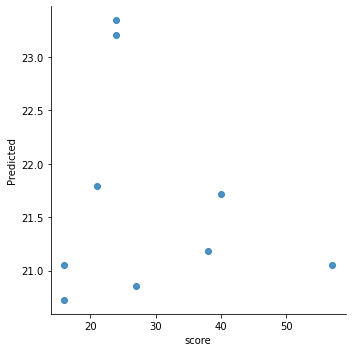

In [34]:
# Plotting the actual vs predicted values
sns.lmplot(x='score', y='Predicted', data=df_results, fit_reg=False)

line_coords = np.arange(df_results.score.min().min(), df_results.Predicted.max().max())

plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')

plt.xlabel('Actual Score', size=10)

plt.title('Actual vs. Predicted')

C:\Users\bips9\anaconda3\envs\fpenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


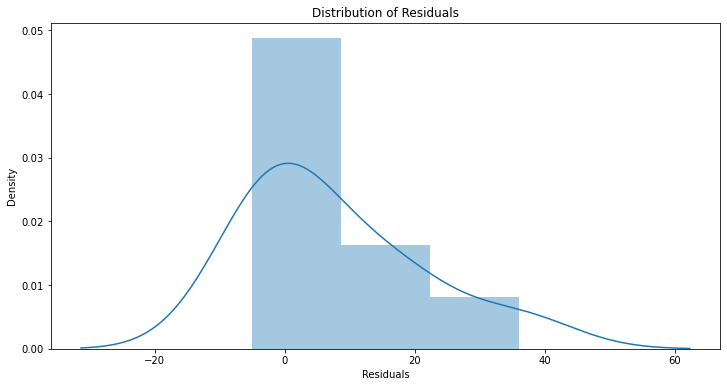

In [35]:
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [36]:
df2 = df[['weather_temperature', 'home_or_away', 'score']]
corr2 = df2.corr()

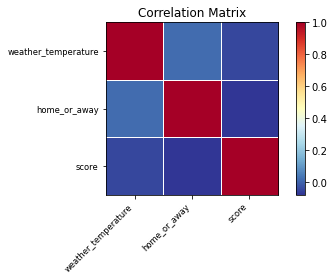

In [37]:
fig= plot_corr(corr2,xnames=corr2.columns)